# Laboratory #02 : Filters and Edges

At the end of this laboratory, you would get familiarized with

*   Convolution
*   Image Filters
*   Edge detection

**Remember this is a graded exercise.**

For every plot, make sure you provide appropriate titles, axis labels, legends, wherever applicable.

---

In [1]:
# Loading necessary libraries (Feel free to add new libraries if you need for any computation)

import numpy as np
from matplotlib import pyplot as plt
from skimage import data, exposure, filters, io, morphology, color, feature
from skimage.util import img_as_float

# Convolution
Hint: 
*   *convolve function is available in skimage.filter.edges module*
*   The mask has to be normalized before convolving with the image

**Exercise:**
*   Read 'camera' image from the data module
*   Convolve the image with a horizontal mask:  (1 x 15) with all values set to ones


In [2]:
camera = data.camera()
mask = np.ones((1, 15)) / 15
horizontal_convolution = filters.edges.convolve(camera, mask)

*   Convolve the image with a vertical mask:  (15 x 1) with all values set to ones

In [3]:
camera = data.camera()
mask = np.ones((15, 1)) / 15
vertical_convolution = filters.edges.convolve(camera, mask)

*   Convolve the image with a 2D mask:  (15 x 15) with all values set to ones

In [4]:
camera = data.camera()
mask = np.ones((15, 15)) / (15 ** 2)
_2d_convolution = filters.edges.convolve(camera, mask)

*   Visualize the original image, horizontal convolution, vertical convolution, 2D convolution using matplotlib subplot.

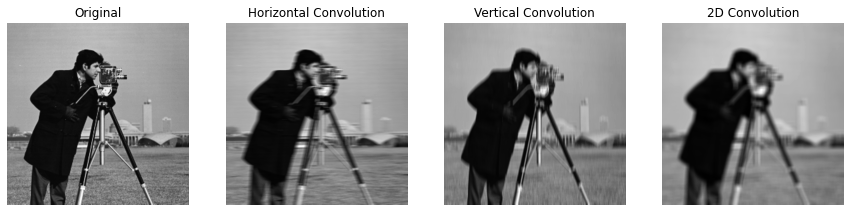

In [5]:
data_images = {'Original': camera, 
        'Horizontal Convolution': horizontal_convolution, 
        'Vertical Convolution': vertical_convolution, 
        '2D Convolution': _2d_convolution}

fig, axs = plt.subplots(1, 4, figsize=(15, 10))
for i, (title, image) in enumerate(data_images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   Apply 2 stage convolution: Horizontal mask (1 x 15) with all values set to 1 followed by vertical mask (15 x 1) with all values set to 1
*   Visualize the original image, 2D convolved image, 2 stage convolved image using matplotlib subplot.


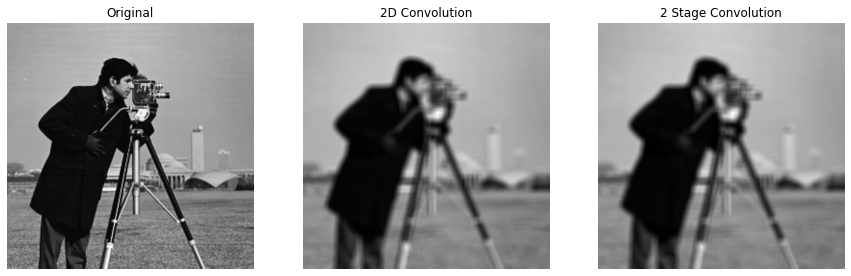

In [6]:
camera = data.camera()
mask = np.ones((1, 15)) / 15
horizontal_convolution = filters.edges.convolve(camera, mask)
mask = np.ones((15, 1)) / 15
_2_stage_convolution = filters.edges.convolve(horizontal_convolution, mask)

data_images = {'Original': camera, 
        '2D Convolution': _2d_convolution,
        '2 Stage Convolution': _2_stage_convolution}

fig, axs = plt.subplots(1, 3, figsize=(15, 10))
for i, (title, image) in enumerate(data_images.items()):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   Is the result different from applying convolution with 2D mask (15 x 15) with all values set to 1?

**Solution**

No, as the convolution is a linear function so applying the operations in a two-staged process shouldn't change the output.

# Image Blurring

*   Why is blurring important?



**Solution**

*(Double-click or enter to edit)*

...

**Exercise: Gaussian Filter**
*   Read 'astronaut' image from the data module
*   Convert the image to grayscale.
*   Apply a gaussian filter with sigma=1
*   Hint: *gaussian function is available in skimage.filters module*

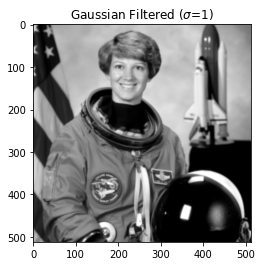

In [7]:
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)
filtered_image = filters.gaussian(astronaut_gray, sigma=1)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filtered ($\sigma$=1)')
plt.show()

*   Apply a gaussian filter with sigma=0. What is the result of this operation?

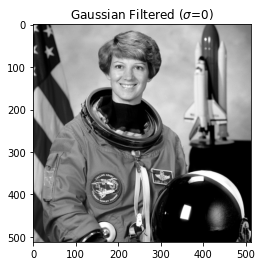

In [8]:
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)
filtered_image = filters.gaussian(astronaut_gray, sigma=0)
plt.imshow(filtered_image, cmap='gray')
plt.title('Gaussian Filtered ($\sigma$=0)')
plt.show()

*   Vary the value of sigma in the gaussian filter. Apply sigma=0.25, 0.5, 1, 1.5, 2, 5
*   Visualize the different results using matplotlib subplot.

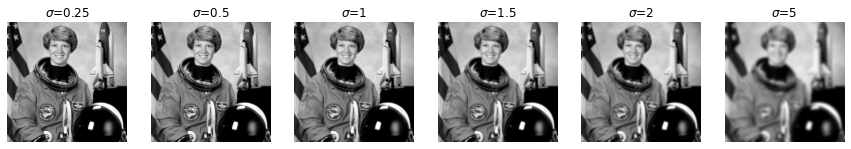

In [9]:
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)

data_images = {'$\sigma$=0.25': 0.25, 
               '$\sigma$=0.5': 0.5,
               '$\sigma$=1': 1,
               '$\sigma$=1.5': 1.5,
               '$\sigma$=2': 2,
               '$\sigma$=5': 5}

fig, axs = plt.subplots(1, len(data_images), figsize=(15, 15))
for i, (title, sigma) in enumerate(data_images.items()):
    filtered_image = filters.gaussian(astronaut_gray, sigma=sigma)
    axs[i].imshow(filtered_image, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*    What happens when a larger sigma value is used and what happens when a smaller sigma value is used in the gaussian filter?
*    How do you think an optimal sigma value can be found?




**Solution**

*(Double-click or enter to edit)*

...

**Exercise: Median Filter**
*   Convert the 'astronauts' image to grayscale
*   Apply median filter with a disk structuring element of radius 1, 5, 10
*   Visualize the original image, filtered image using different structuring element using matplotlib subplot.

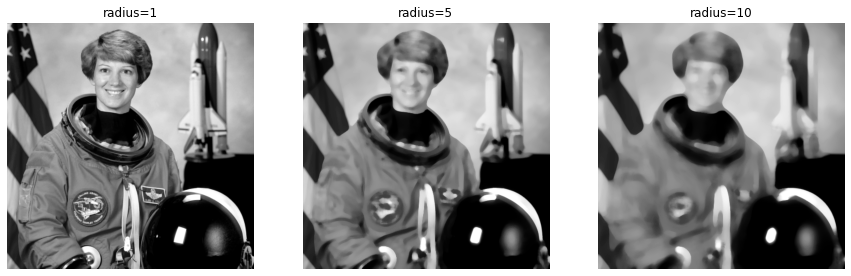

In [10]:
# solution
astronaut = data.astronaut()
astronaut_gray = color.rgb2gray(astronaut)
selemObjects = {
    "radius=1": morphology.selem.disk(1),
    "radius=5": morphology.selem.disk(5),
    "radius=10": morphology.selem.disk(10)
}
f, axs = plt.subplots(1, 3, figsize=(15, 9))
for i, (title, selemObject) in enumerate(selemObjects.items()):
    filteredImage = filters.median(astronaut_gray, selem=selemObject)
    axs[i].imshow(filteredImage, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

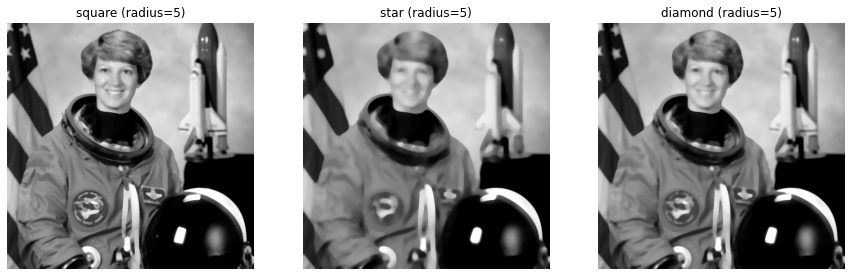

In [11]:
selemObjects = {
    "square (radius=5)": morphology.selem.square(5),
    "star (radius=5)": morphology.selem.star(5),
    "diamond (radius=5)": morphology.selem.diamond(5)
}
f, axs = plt.subplots(1, 3, figsize=(15, 9))
for i, (title, selemObject) in enumerate(selemObjects.items()):
    filteredImage = filters.median(astronaut_gray, selem=selemObject)
    axs[i].imshow(filteredImage, cmap='gray')
    axs[i].set_title(title)
    axs[i].axis('off')
plt.show()

*   What is the effect of the structuring element on the median filter?


**Solution**

*(Double-click or enter to edit)*

...

*   What is the difference between gaussian filter, mean filter and median filter?
*   Provide an example where each one would be used.


**Solution**

*(Double-click or enter to edit)*

...

**Exercise: Effect of noise**

It is easy to add noise to an image using the random_noise function available in skimage.util

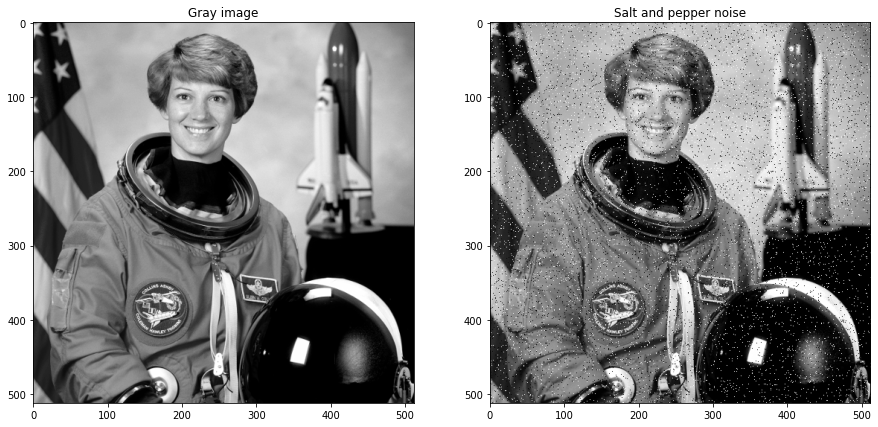

In [12]:
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_noise = random_noise(image, mode='s&p')  # salt and pepper noise is added

fig, ax = plt.subplots(ncols=2, nrows=1, figsize=(15, 7))

ax[0].imshow(image, cmap='gray')
ax[0].set_title('Gray image')
ax[1].imshow(img_noise, cmap='gray')
ax[1].set_title('Salt and pepper noise')

plt.show()

*   Create noisy images with **gaussian** noise and **salt and pepper** noise.
*   Apply mean filter, median filter and gaussian filter in each of the noisy images.
*   Visualize the images and observe the difference in each filter with respect to the noise.

In [13]:
# solution
from skimage.util import random_noise
image = data.astronaut()
image = color.rgb2gray(image)

img_sp = random_noise(image)
img_gauss = random_noise(image, mode='s&p')

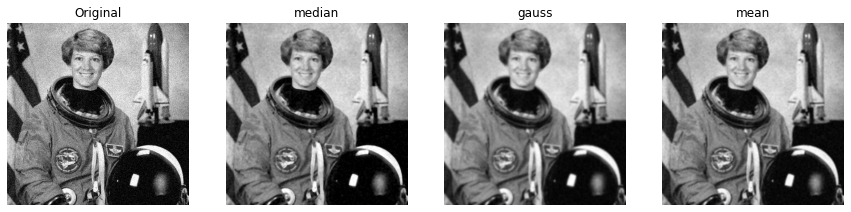

In [14]:
selemObject = morphology.selem.square(5)
selemObject = selemObject / np.sum(selemObject)
filtersDict = {
    "Original": img_sp,
    "median": filters.median(img_sp, selem=selemObject),
    "gauss": filters.gaussian(img_sp, sigma=2),
    "mean": filters.rank.mean(img_sp, selem=selemObject)
}

f, ax = plt.subplots(1, 4, figsize=(15, 9))
for idx, (title, filteredImage) in enumerate(filtersDict.items()):
    ax[idx].set_title(title)
    ax[idx].imshow(filteredImage, cmap='gray')
    ax[idx].axis('off')
plt.show()

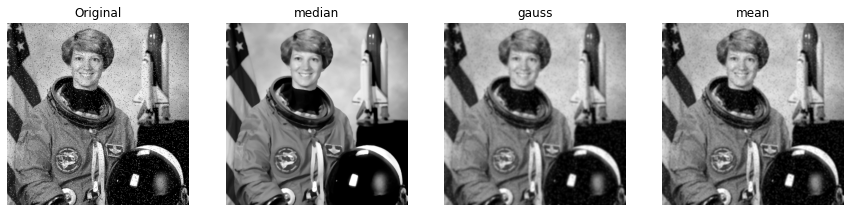

In [15]:
filtersDict = {
    "Original": img_gauss,
    "median": filters.median(img_gauss, selem=selemObject),
    "gauss": filters.gaussian(img_gauss, sigma=2),
    "mean": filters.rank.mean(img_gauss, selem=selemObject)
}

f, ax = plt.subplots(1, 4, figsize=(15, 9))
for idx, (title, filteredImage) in enumerate(filtersDict.items()):
    ax[idx].set_title(title)
    ax[idx].imshow(filteredImage, cmap='gray')
    ax[idx].axis('off')
plt.show()

*   Which filter works better for gaussian noise and which filter works better for salt and pepper noise? Explain your choice of the filter for that particular type of noise.


**Solution**

*(Double-click or enter to edit)*

...

# Image Sharpening

A sharpening filter can be broken down into two steps: It takes a smoothed image, subtracts it from the original image to obtain the "details" of the image, and adds the "details" to the original image.

enhanced image = original + amount * (original - blurred)

**Exercise:**
*   Read 'moon' image from the data module
*   Perform smoothing using a gaussian filter of sigma 1
*   Subtract the smoothened image from the original image.
*   Enhance the image with amount=1
*   Keeping amount=1, change the value of sigma=5,10 and repeat the enhancements
*   Using the best sigma value, vary the amount value=0.5,2,5,10
*   Visualize each of the results using matplotlib

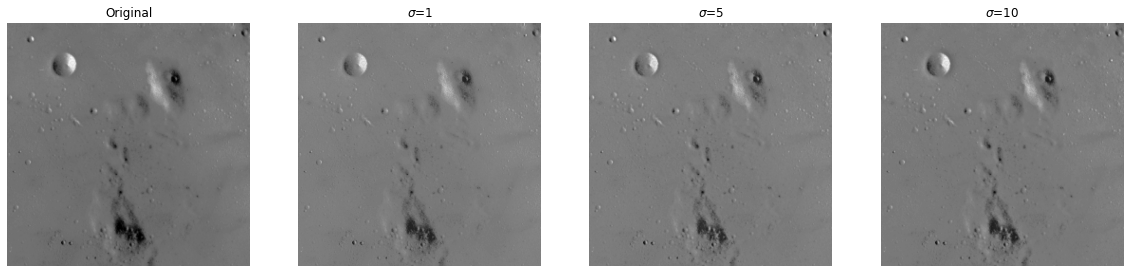

In [16]:
# solution
def enhanceImage(original, amount=1, sigma=1):
    original = img_as_float(original.copy())
    blurred = filters.gaussian(original, sigma=sigma)
    enhanced = original + amount * (original - blurred)
    return enhanced

moonImage = data.moon()
sigmaValues = [1, 5, 10]

f, ax = plt.subplots(1, len(sigmaValues)+1, figsize=(20, 20))
ax[0].set_title("Original")
ax[0].imshow(moonImage, cmap='gray')
ax[0].axis('off')
for idx, sigmaValue in enumerate(sigmaValues):
    ax[idx+1].set_title(f"$\sigma$={sigmaValue}")
    ax[idx+1].imshow(enhanceImage(moonImage, sigma=sigmaValue), cmap='gray')
    ax[idx+1].axis('off')
plt.show()

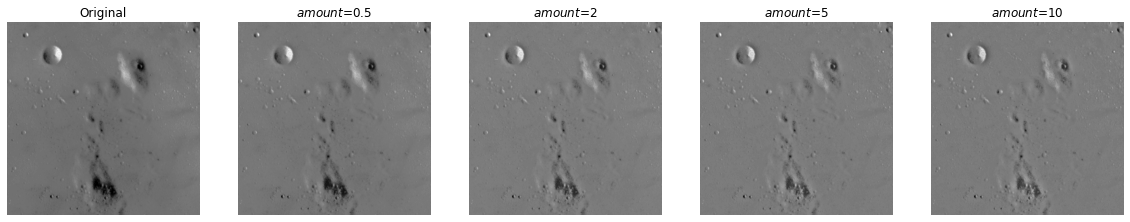

In [17]:
ammountValues = [.5, 2, 5, 10]
sigmaValue = 10

f, ax = plt.subplots(1, len(ammountValues)+1, figsize=(20, 20))
ax[0].set_title("Original")
ax[0].imshow(moonImage, cmap='gray')
ax[0].axis('off')
for idx, ammountValue in enumerate(ammountValues):
    ax[idx+1].set_title(f"$amount$={ammountValue}")
    ax[idx+1].imshow(enhanceImage(moonImage, amount=ammountValue, sigma=sigmaValue), cmap='gray')
    ax[idx+1].axis('off')
plt.show()

# Edge Detection

**Exercise:**
*   Read 'camera' image from the data module
*   Perform sobel, prewitt and roberts edge detection on the image
*   Visualize the original image, the edges and the edges superimposed on the original image

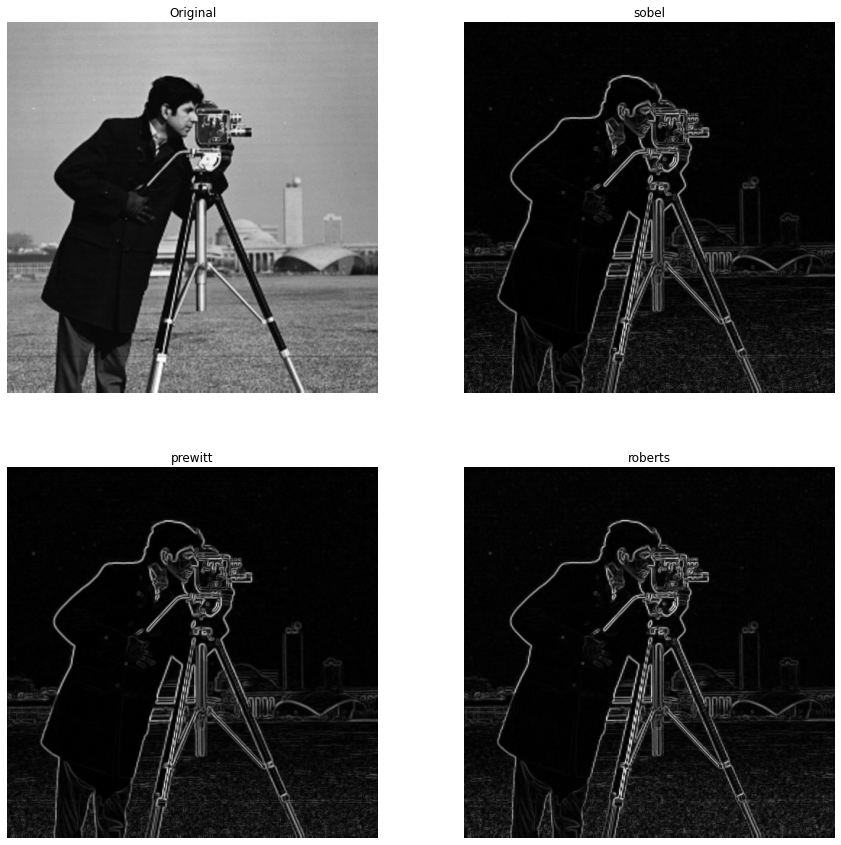

In [18]:
# solution
def process3DImage(image: np.ndarray, imageFilter, **kwargs) -> np.ndarray:
    filteredImage = np.zeros_like(image)
    if len(filteredImage.shape) == 2:
        return imageFilter(image, **kwargs)
    elif len(filteredImage.shape) == 3:
        for idx in range(image.shape[2]):
            filteredImage[:, :, idx] = imageFilter(image[:, :, idx], **kwargs)
        return filteredImage

cameraImage = img_as_float(data.camera())
processedImages = {
    "sobel": process3DImage(cameraImage, filters.sobel),
    "prewitt": process3DImage(cameraImage, filters.prewitt),
    "roberts": process3DImage(cameraImage, filters.roberts)
}

f, ax = plt.subplots(2, 2, figsize=(15, 15))
ax[0][0].set_title("Original")
ax[0][0].imshow(cameraImage, cmap='gray')
ax[0][0].axis('off')
for idx, (label, image) in enumerate(processedImages.items()):
    idx = idx + 1
    ax[idx//2][idx%2].set_title(label)
    ax[idx//2][idx%2].imshow(image, cmap='gray')
    ax[idx//2][idx%2].axis('off')
f.show()


*   What is the difference between each of the edge detectors?
*   What does you think is the limitation of each of the detector?



**Solution**

*(Double-click or enter to edit)*

...

**Exercise: Canny edge detector**
*   Read 'camera' image from the data module
*   Apply canny operator with default parameters
*   Apply canny by varying sigma=1, 3, 5, 10
*   Visualize the original image, edges and the edges superimposed on the original image.

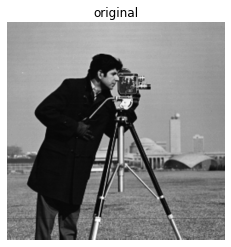

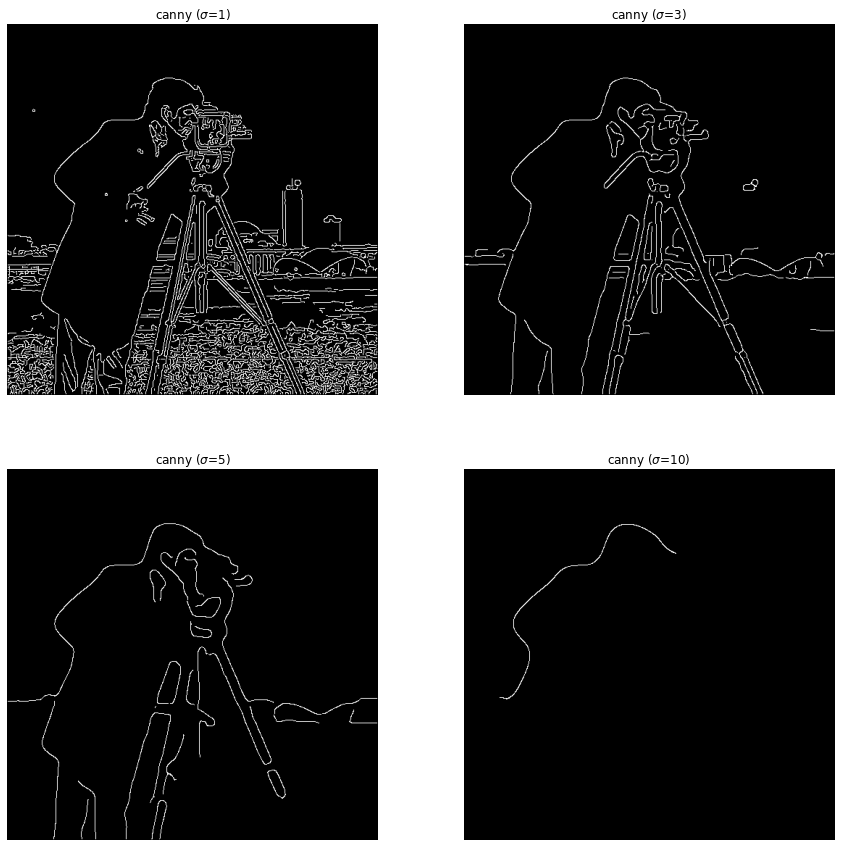

In [20]:
# solution
cameraImage = img_as_float(data.camera())

sigmaValues = [1, 3, 5, 10]

plt.title("original")
plt.imshow(cameraImage, cmap='gray')
plt.axis('off')
plt.show()

f, ax = plt.subplots(2, 2, figsize=(15, 15))
for idx, sigmaValue in enumerate(sigmaValues):
    ax[idx//2][idx%2].set_title(f"canny ($\sigma$={sigmaValue})")
    ax[idx//2][idx%2].imshow(process3DImage(cameraImage, feature.canny, sigma=sigmaValue), cmap='gray')
    ax[idx//2][idx%2].axis('off')
f.show()


*   What is the effect of varying the sigma values on the edges?
*   What do the high threshold and low threshold parameters denote?


**Solution**

*(Double-click or enter to edit)*

...

*   What is the algorithm behind the Canny operator?


**Solution**

*(Double-click or enter to edit)*

...


---

## **End of P2: Filters and Edges**
Deadline for P2 submission in CampusVirtual is: **Thursday, the 15th of October, 2020**
